# Классификация изображений

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import fetch_olivetti_faces

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve

In [ ]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

1. Загрузите датасет Olivetti faces;
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.
3. Выведите информацию о количественных параметрах датасета;

Датасет **Olivetti faces** - это один из известных модельных наборов данных для обучения методам классификации изображений. Его можно получить с помощью стандартных средств sklearn:

In [ ]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

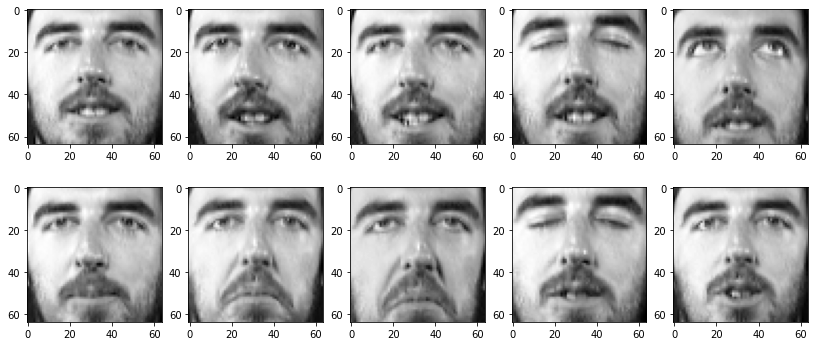

In [ ]:
faces = fetch_olivetti_faces()
images = faces.images

fig = plt.figure(figsize=(14, 6))
for i in range(10):
    img_grid = fig.add_subplot(2, 5, i+1)
    img_grid.imshow(images[i+100], cmap=plt.cm.gray)

plt.show()

5. Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
def plot_images(images, total_images=10, rows=2, cols=5):
  fig = plt.figure(figsize=(14, 6))
  for i in range(total_images):
    img_grid = fig.add_subplot(2, 5, i+1)
    img_grid.imshow(images[i+100], cmap=plt.cm.gray) 

faces = fetch_olivetti_faces()
images, features, targets = faces.images, faces.data, faces.target

X_train, X_test, Y_train, Y_test = train_test_split(features, targets,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    # stratify=targets
                                                    )

6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [ ]:
model = svm.SVC(kernel='poly')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
* достоверность предсказания (accuracy);
* точность (precision);
* полнота (recall);

Predict the **target** for **training data**

In [ ]:
metrics.accuracy_score(Y_train, model.predict(X_train)), \
metrics.precision_score(Y_train, model.predict(X_train), average='weighted'), \
metrics.recall_score(Y_train, model.predict(X_train), average='weighted')

(1.0, 1.0, 1.0)

Predict the **target** for **test data**

In [ ]:
metrics.accuracy_score(Y_test, Y_pred), \
metrics.precision_score(Y_test, Y_pred, average='weighted'), \
metrics.recall_score(Y_test, Y_pred, average='weighted')

(0.9625, 0.9760416666666666, 0.9625)

8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(kernel='poly'), 
                                                        features, targets, 
                                                        cv=10, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

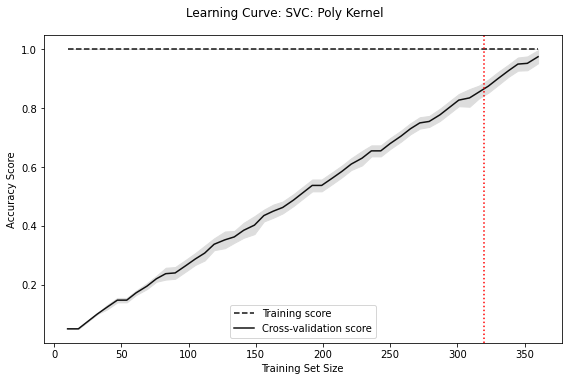

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.suptitle("Learning Curve: SVC: Poly Kernel", y=1.05)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.axvline(x=len(faces.data)*0.8, linestyle=':', color='red')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.tight_layout()

plt.legend(['Training score', 'Cross-validation score'],loc='lower center')
plt.show()

9. Сделайте вывод о применимости модели.

Точность модели линейно зависит от размера обучающей выборки: с увеличением обучающей выборки точность увеличивается до значения единицы, смыкаясь с другим графиком.

Wrongly detected image-locations: 
10
22

				TEST FACES


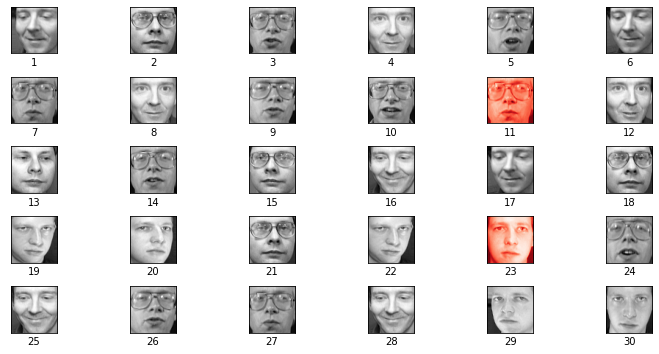


				PREDICTED FACES


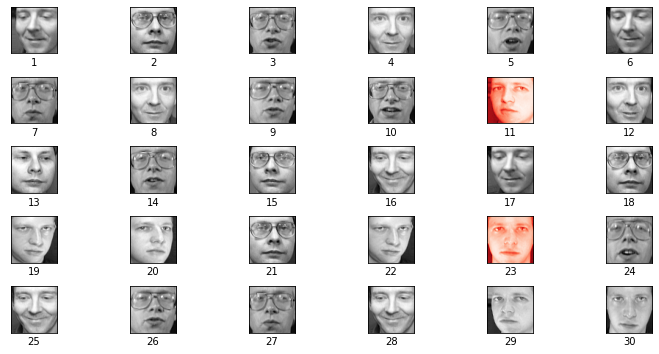

In [ ]:
def plot_images(images, total_images=20, rows=4, cols=5, title=''):
    fig = plt.figure(figsize=(16,6))
    for i in range(total_images):
        # plt.title(f'{title}')
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.set_xlabel(f'{i+1}')
        img_grid.set_xticks([])
        img_grid.set_yticks([])
        plt.subplots_adjust(wspace=-0.6, hspace=0.5)
        if Y_test[i] != Y_pred[i]:
          img_grid.imshow(images[i], cmap=plt.get_cmap('Reds_r'))
        else:
          img_grid.imshow(images[i], cmap=plt.cm.gray)


print("Wrongly detected image-locations: ")
for i in range (30):
    if Y_test[i] != Y_pred[i]:
        print(i)

faces_test = []
for i in Y_test:
    faces_test.append(images[i])

faces_predict = []
for i in Y_pred:
    faces_predict.append(images[i])

print(f'\n\t\t\t\tTEST FACES')
plot_images(faces_test, total_images=30, rows=5, cols=6)
plt.show()
print(f'\n\t\t\t\tPREDICTED FACES')
plot_images(faces_predict, total_images=30, rows=5, cols=6)
plt.show()

При работе с разными данными часто требуется выводить из на экран. Хотя это абсолютно не нужно для работы самих алгоритмов машинного обучения, зачастую проводится, например, анализ ошибок. Для этого нужно уметь выводить изображения стандартными средствами. В библиотеке matplotlib, например, можно воспользоваться функцией imshow:

Методы машинного обучения библиотеки sklearn рассчитаны, что на вход будет подаваться плоский массив признаков. Однако, изображение - это двумерный объект. Можно разными способами превратить изображение в набор признаков. В нейронных моделях для этого используются свертки. Но самый простой способ - просто представить изображение как линейную последовательность пикселей.

Если изображение имеет разрешение 64 на 64 пикселя, то всего пикселей получается 4096. Если изображение черно-белое (в градациях серого), то значением признака, соответствующего каждому пикселю можно взять яркость этого пикселя. Если изображение цветное, то каждому пикселю может соответствовать три разных признака. Причем обычно такие значения нормируются к шкале долей единицы.

Такой набор признаков уже можно использовать как исходные данные для машинного обучения. Далее алгоритм машинного обучения полностью совпадает с работой с численными данными.

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def classifier(method):
  model = methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred),
                                metrics.precision_score(Y_test, Y_pred, average='weighted'), 
                                metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [ ]:
methods_score = dict()
for method_name in methods.keys():
  classifier(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

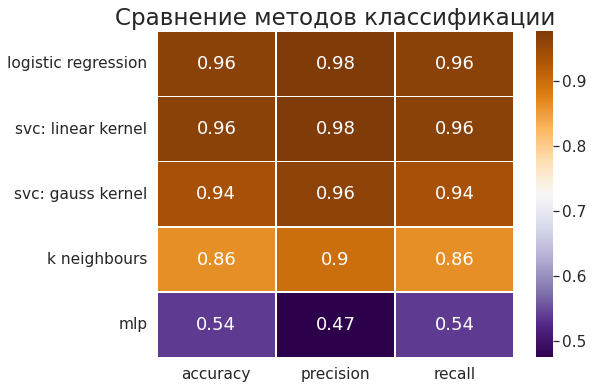

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[39])

* Наилучшим показателем достоверности предсказания обладает модель, построенная с помощью `логистической регрессии`, `метода опорных векторов с линейным ядром`
* Наилучшим показателем точности обладает модель, построенная с помощью `логистической регрессии`, `метода опорных векторов с линейным ядром`
* Наилучшим показателем полноты обладает модель, построенная с помощью `логистической регрессии`, `метода опорных векторов с линейным ядром`

Модель с лучшими показателями эффективности построена с помощью `логистической регрессии`, `метода опорных векторов с линейным ядром`.

In [ ]:
import time

### Построим кривые обучения для различных методов

In [ ]:
def learning_curve_plot(i, method):
  start_time = time.time()
  train_sizes, train_scores, test_scores = learning_curve(methods[method], 
                                                        features, targets, 
                                                        # cv=10, 
                                                        # scoring='accuracy', 
                                                        # n_jobs=-1, 
                                                        # train_sizes=np.linspace(0.01, 1.0, 50)
                                                        )
  print(f'{method}: {time.time() - start_time}')
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  ax[i].plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  ax[i].plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  ax[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  ax[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  ax[i].set_title(f"Learning Curve: {method}")
  ax[i].set_xlabel("Training Set Size"), ax[i].set_ylabel("Accuracy Score")
  plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(28,5))
plt.suptitle('Learning Curves for Different Classification Methods', y=1.05)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)
plt.legend(['Training score', 'Cross-validation score'], loc='lower center',bbox_to_anchor=(-2, -0.5))
plt.show()

```

```

* logistic regression: 54.879873514175415
* svc: linear kernel: 4.188092470169067
* svc: gauss kernel: 7.999089241027832
* k neighbours: 1.0865585803985596
* mlp: 71.91907167434692

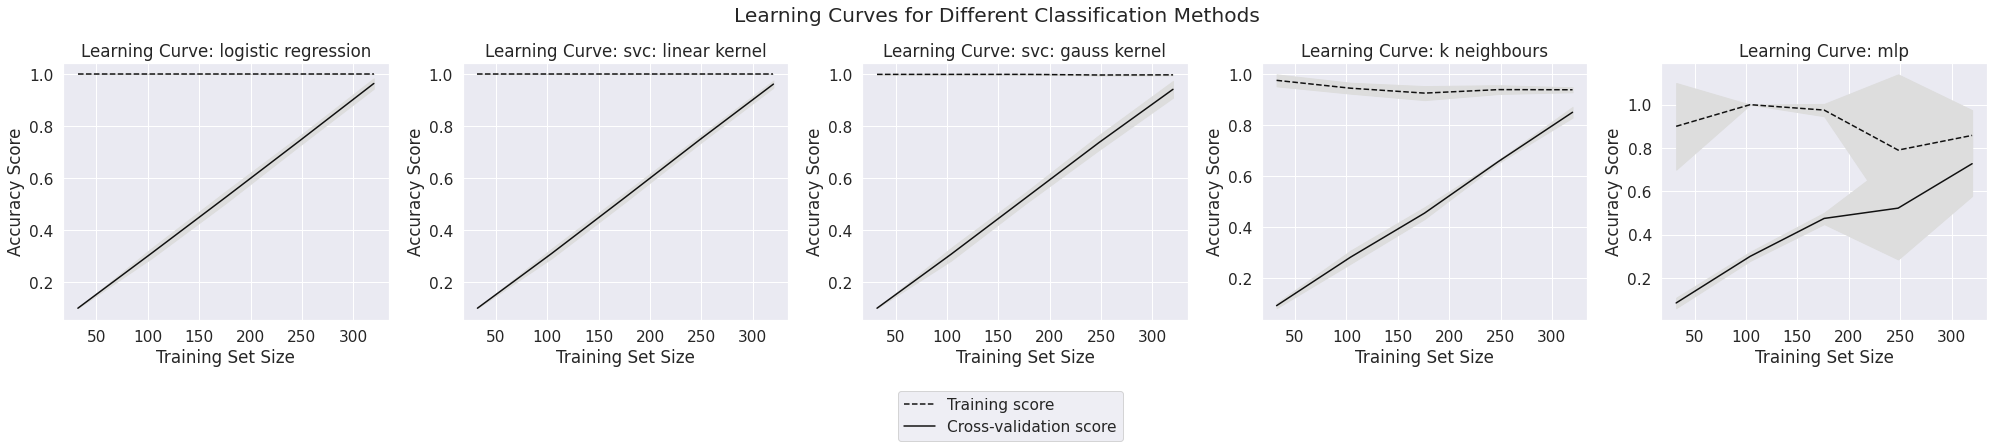

In [ ]:
images[0][0]

array([0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ,
       0.607438  , 0.6570248 , 0.677686  , 0.69008267, 0.6859504 ,
       0.70247936, 0.6983471 , 0.6942149 , 0.6983471 , 0.69008267,
       0.6942149 , 0.69008267, 0.6983471 , 0.70247936, 0.70247936,
       0.6983471 , 0.7066116 , 0.7107438 , 0.71900827, 0.72727275,
       0.75619835, 0.77272725, 0.7768595 , 0.7768595 , 0.75619835,
       0.76033056, 0.78099173, 0.76033056, 0.76859504, 0.75619835,
       0.73966944, 0.74380165, 0.73966944, 0.74380165, 0.71900827,
       0.71900827, 0.71487606, 0.71900827, 0.71900827, 0.7231405 ,
       0.72727275, 0.7355372 , 0.71487606, 0.7231405 , 0.71900827,
       0.71487606, 0.7107438 , 0.70247936, 0.7066116 , 0.6983471 ,
       0.677686  , 0.6570248 , 0.6322314 , 0.5661157 , 0.5247934 ,
       0.446281  , 0.37190083, 0.3305785 , 0.30578512], dtype=float32)